This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
type(train_images)

numpy.ndarray

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [12]:
28*28

784

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**The compilation step**

In [17]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [18]:
print(train_images.dtype)
print(train_labels.dtype)
print(test_images.dtype)
print(test_labels.dtype)

uint8
uint8
uint8
uint8


In [19]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [21]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**"Fitting" the model**

In [20]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.4364
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.1195
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.0712
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9858 - loss: 0.0491
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0398


**Using the model to make predictions**

In [22]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([9.2887610e-08, 8.6152596e-09, 1.0230323e-05, 4.3237582e-05,
       9.8606616e-11, 1.9645788e-07, 4.1821108e-12, 9.9993503e-01,
       2.7052405e-07, 1.0806663e-05], dtype=float32)

In [33]:
sum(predictions[0])

0.9999998740928876

In [24]:
predictions[0][7]

0.99993503

In [25]:
test_labels[0]

7

**Evaluating the model on new data**

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")
print(f"test_loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.9785 - loss: 0.0705
test_acc: 0.9818000197410583
test_loss: 0.058986976742744446


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [45]:
import numpy as np
x = np.array(12)
x

array(12)

In [46]:
x.ndim

0

In [47]:
x.shape

()

In [48]:
type(x)

numpy.ndarray

In [49]:
y = np.array([12])
y

array([12])

In [50]:
y.ndim

1

In [52]:
y.shape

(1,)

### Vectors (rank-1 tensors)

In [53]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [54]:
x.ndim

1

In [55]:
x.shape

(5,)

In [70]:
for i in range(-10, 260):
    x = np.array(i).astype('uint8')
    print(i, x)

-10 246
-9 247
-8 248
-7 249
-6 250
-5 251
-4 252
-3 253
-2 254
-1 255
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99
100 100
101 101
102 102
103 103
104 104
105 105
106 106
107 107
108 108
109 109
110 110
111 111
112 112
113 113
114 114
115 115
116 116
117 117
118 118
119 119
120 120
121 121
122 122
123 123
124 124
125 125
126 126
127 127
128 128
129 129
130 130
131 131
132 132
133 133
134 134
135 135
136 136
137 137
138 138
139 139
140 140
141 141
142 142
143 1

### Matrices (rank-2 tensors)

In [43]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [44]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [72]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [73]:
train_images.ndim

3

In [74]:
train_images.shape

(60000, 28, 28)

In [75]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

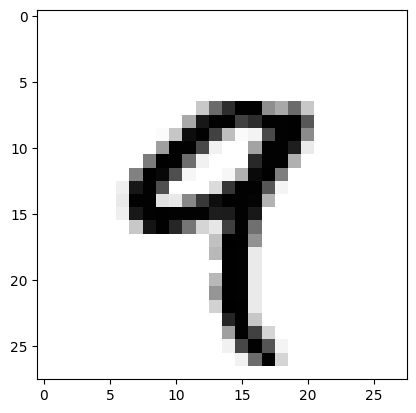

In [76]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [77]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [78]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [79]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [80]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [81]:
my_slice = train_images[:, 14:, 14:]

In [82]:
my_slice = train_images[:, 7:-7, 7:-7]

In [86]:
106168320*32 / 8 /1024/1024

405.0

### The notion of data batches

In [87]:
batch = train_images[:128]

In [88]:
batch = train_images[128:256]

In [89]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [100]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [101]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [102]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [104]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.81 s


### Broadcasting

In [109]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [112]:
y

array([0.30973411, 0.44400758, 0.05109061, 0.14116149, 0.03746476,
       0.84424714, 0.86641338, 0.03037304, 0.76740345, 0.52773677])

In [113]:
y = np.expand_dims(y, axis=0)

In [114]:
Y = np.concatenate([y] * 32, axis=0)

In [115]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [116]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [117]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [0]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [0]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [0]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [0]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [0]:
train_images = train_images.reshape((60000, 28 * 28))

In [0]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

In [0]:
x = x.reshape((6, 1))
x

In [0]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [119]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [120]:
print(grad_of_y_wrt_x)

tf.Tensor(2.0, shape=(), dtype=float32)


In [121]:
tf.Variable(tf.random.uniform((2, 2)))

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.7618412, 0.8819734],
       [0.9249972, 0.9912052]], dtype=float32)>

In [122]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [123]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [124]:
tf.Variable(tf.zeros((2,)))

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [143]:
W = tf.Variable(tf.random.uniform((2, 2)))
print('W:', W)
b = tf.Variable(tf.zeros((2,)))
print('b:', b)
x = tf.random.uniform((2, 2))
print('x:', x)
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
print('y:', y)
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
print('grad:', grad_of_y_wrt_W_and_b)

W: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.10262883, 0.7472724 ],
       [0.96188915, 0.24840689]], dtype=float32)>
b: <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>
x: tf.Tensor(
[[0.6249373  0.98303676]
 [0.7631744  0.26778543]], shape=(2, 2), dtype=float32)
y: tf.Tensor(
[[1.009709   0.7111915 ]
 [0.33590358 0.6368189 ]], shape=(2, 2), dtype=float32)
grad: [<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.3881117, 1.3881117],
       [1.2508222, 1.2508222]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]


In [144]:
0.6249373 + 0.98303676

1.60797406

## Looking back at our first example

In [145]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [146]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [147]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [148]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8711 - loss: 0.4476
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9658 - loss: 0.1156
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.0736
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9850 - loss: 0.0504
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.0356


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [150]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [151]:
60000/128

468.75

#### A simple Sequential class

In [152]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [153]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [154]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [155]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [156]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [157]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [158]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [159]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.93
loss at batch 100: 2.23
loss at batch 200: 2.20
loss at batch 300: 2.07
loss at batch 400: 2.19
Epoch 1
loss at batch 0: 1.90
loss at batch 100: 1.88
loss at batch 200: 1.83
loss at batch 300: 1.70
loss at batch 400: 1.82
Epoch 2
loss at batch 0: 1.58
loss at batch 100: 1.58
loss at batch 200: 1.51
loss at batch 300: 1.41
loss at batch 400: 1.50
Epoch 3
loss at batch 0: 1.33
loss at batch 100: 1.34
loss at batch 200: 1.25
loss at batch 300: 1.20
loss at batch 400: 1.27
Epoch 4
loss at batch 0: 1.13
loss at batch 100: 1.16
loss at batch 200: 1.05
loss at batch 300: 1.04
loss at batch 400: 1.10
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 1.03
loss at batch 200: 0.91
loss at batch 300: 0.92
loss at batch 400: 0.98
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.92
loss at batch 200: 0.80
loss at batch 300: 0.83
loss at batch 400: 0.89
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.84
loss at batch 200: 0.72
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [160]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81


## Summary